In [46]:
# Python program to HMM with 2 parts.
# Part1: figure out where the stationary "hidden" car is!
# The car and your agent (car) live in a nxn periodic grid world.
# assume a shape of car is square, length is 1

import numpy as np
import pandas as pd
import sys
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [47]:
# create discrete colormap to illustrate your belief
# dark red - most likely the position of the car!
# red - more likely the position of the car
# Gray level - belief level, darker = higher belief
def seeTrackedCar(gridIm):
    cmap = colors.ListedColormap(
        ['whitesmoke', 'gainsboro', 'silver', 'lightgray',
         'dimgray', 'gray', 'darkgray',  'red', 'darkred', 'orange'])
    bounds = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    fig, ax = plt.subplots()
    ax.imshow(gridIm, cmap=cmap, norm=norm)
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    #
    #ax.invert_yaxis()
    ax.set_xticks(np.arange(0, gridIm.shape[1], 1))
    ax.set_yticks(np.arange(0, gridIm.shape[0], 1))
    plt.show()

In [48]:
# print the values stored on grid just in case you are interested in the numbers
# i = x = row,  j = y = column
def printGrid(grid):
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]-1):
            print(f"{grid[i][j]:.3f}, ", end="")
        print(f"{grid[i][grid.shape[1] - 1]:.3f}")


In [49]:
# Function: Get Belief
# ---------------------
# Updates beliefs based on the distance observation and your car's (agent's) position.
# Returns your belief of the probability that the car is in each tile. Your
# belief probabilities should sum to 1.
# @return the probability matrix
def getBelief(observation, gridSize, carLength):
    std = carLength * 1. / 3

    #your code
    p_map = np.zeros((gridSize, gridSize))

    for t in range(observation.shape[0]):
        agentX = int(observation.iloc[t]['agentX'])
        agentY = int(observation.iloc[t]['agentY'])
        eDist = float(observation.iloc[t]['eDist'])

        likelihood = np.zeros((gridSize, gridSize))

        for x in range(gridSize):
            for y in range(gridSize):
                # distance
                dx = min(abs(agentX - x), gridSize - abs(agentX - x))
                dy = min(abs(agentY - y), gridSize - abs(agentY - y))
                trueDist = math.sqrt(dx**2 + dy**2)

                # likelihood
                likelihood[x, y] = norm.pdf(eDist, trueDist, std)

        if t == 0:
            p_map = likelihood
        else:
            p_map = p_map * likelihood

        total = np.sum(p_map)
        if total > 0:
            p_map = p_map / total

    
   
    return p_map


20 10 stationaryCarReading10.csv
p max 0.9999964140037655 is at (row, column) (np.int64(4), np.int64(5))


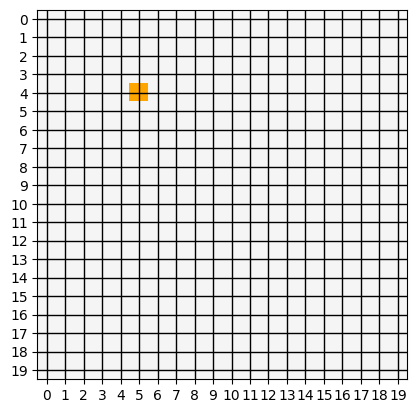

0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000
0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000
0.000, 0.000, 0.000, 0.000,

In [ ]:
# No need to change this function.
def hmm_part1(gridSize, reportingTime, microphoneReadingFileName):
    
    carLength = 1
    print(gridSize, reportingTime, microphoneReadingFileName)

    df = pd.read_csv(microphoneReadingFileName, nrows=reportingTime)  # reading only reportingTime rows
    
    carPosBelief = getBelief(df, gridSize, carLength)  # return numpy array of probabilities
    
    #Indices of max element in flattened array
    indices = (np.unravel_index(np.argmax(carPosBelief), carPosBelief.shape))
    print("p max",  carPosBelief.max(), "is at (row, column)", indices)
    
    seeTrackedCar(carPosBelief)
    printGrid(carPosBelief)
    
    df = pd.DataFrame(carPosBelief, columns=np.array(list(range(gridSize))))

    outputFileName = "probMap_gridSize" + str(gridSize)+"_atTime" + str(reportingTime) + ".csv"
    df.to_csv(
        outputFileName,
        sep=',',
        float_format="%.3f",
        index=False
    )
    return

gridSize = 20
reportingTime = 10
microphoneReadingFileName = "stationaryCarReading10.csv"
hmm_part1(gridSize, reportingTime, microphoneReadingFileName)


#WORKS CITED 
#ChatGPT was used to help decypher some of the Python syntax, such as iloc, as well as help understand the formulas needed
#GeeksForGeeks was consulted to see a general setup in python for a HMM